
# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 In this project i will be doing data wrangling , mining and cleaning on the soccer database in top world leagues from 2008 to 2016 and i will be analysing data and performing visualizations to extract infromation from the three main tables which are Match table, Teams table and players table. 


### Question(s) for Analysis
 I will be using data analysis and visualization to answer many questions for each table.For example, i will use match table to know the most and least goal scoring leagues, the most and least winning teams overall and the most improved team.For the teams table i will extract the attributes of the top 5 winning and scoring teams, and for the players table i will extract the highest record for penalty takers , highest rated players and their attributes and the relation between attributes and overall rating, and the most promising young soccer stars.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

 Now we will take a look at our data to have a better vision about how we can use it and to be easier to clean.


In [2]:
Country=pd.read_csv('Country.csv')
Player_Attributes=pd.read_csv('Player_Attributes.csv')
Team_Attributes=pd.read_csv('Team_Attributes.csv')
Team=pd.read_csv('Team.csv')
Player=pd.read_csv('Player.csv')
Match=pd.read_csv('Match.csv')
League=pd.read_csv('League.csv')

In [5]:
Match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [6]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
Match.isnull().sum().sum()

407395

In [11]:
Match.duplicated().sum()

0

In [12]:
Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [13]:
League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [14]:
Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [15]:
Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [17]:
Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [18]:
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [20]:
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [21]:
Player_Attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000



### Data Cleaning
 Now after we looked at our databases it is team for data cleaning.I will be cleaning all the databases into three main tables: Match, Team and Player for easier and tidier insights and analysis, this will be done with merge function and removing null values and duplicates.
 

In [3]:
#Please be informed that i made all the rough work in another noteook that is why i am just pasting my code from my working
#notebook for a more tidy look,thanks.
#First i will begin by cleaning Match table.
#I will only use columns that are usable , especially that the last columns are full of null values
#Here i am joining Match and Country tables then cleaning it.
Match=Match.loc[:,:'away_team_goal']
Match=Match.merge(Country,how='inner',left_on='country_id',right_on='id')
Match['date']=pd.to_datetime(Match['date'])
Match['season_year']=Match['date'].dt.year
Match.rename(columns={'name':'country_name','id_x':'id'},inplace=True)
Match.drop(columns='id_y',inplace=True)

In [4]:
#Here i am joining Match and League tables then cleaning it.
Match=Match.merge(League,how='inner',left_on='league_id',right_on='id')
Match.rename(columns={'name':'league_name','id_x':'id','country_id_x':'country_id'},inplace=True)
Match.drop(columns=['id_y','country_id_y'],inplace=True)

In [5]:
#Here i am joining Match and Home Team tables then cleaning it.
Match=Match.merge(Team,how='inner',left_on='home_team_api_id',right_on='team_api_id')
Match.rename(columns={'team_long_name':'home_team_name','id_x':'id','country_id_x':'country_id'},inplace=True)
Match.drop(columns=['id_y','team_api_id','team_short_name','team_fifa_api_id'],inplace=True)

In [6]:
#Here i am joining Match and Away Team tables then cleaning it.
Match=Match.merge(Team,how='inner',left_on='away_team_api_id',right_on='team_api_id')
Match.rename(columns={'team_long_name':'away_team_name','id_x':'id',},inplace=True)
Match.drop(columns=['id_y','team_api_id','team_short_name','team_fifa_api_id'],inplace=True)

In [7]:
#Now removing unnecessary columns
Match.drop(columns='league_id',inplace=True)
Match.drop(columns=['home_team_api_id','away_team_api_id'],inplace=True)
Match.drop(columns='country_id',inplace=True)

In [27]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              25979 non-null  int64         
 1   season          25979 non-null  object        
 2   stage           25979 non-null  int64         
 3   date            25979 non-null  datetime64[ns]
 4   match_api_id    25979 non-null  int64         
 5   home_team_goal  25979 non-null  int64         
 6   away_team_goal  25979 non-null  int64         
 7   country_name    25979 non-null  object        
 8   season_year     25979 non-null  int64         
 9   league_name     25979 non-null  object        
 10  home_team_name  25979 non-null  object        
 11  away_team_name  25979 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 2.6+ MB


In [28]:
Match.isnull().sum().sum()

0

In [30]:
Match.duplicated().sum()

0

In [8]:
#Now i will be cleaning Teams table
#First drop the column that is mostly nulls
Team_Attributes.drop(columns='buildUpPlayDribbling',inplace=True)

In [9]:
Team=Team.merge(Team_Attributes,how='inner',on=['team_fifa_api_id','team_api_id'])
Team['date']=pd.to_datetime(Team['date'])
Team.rename(columns={'id_x': 'id'},inplace=True)
Team.drop(columns=['team_fifa_api_id','team_api_id','id_y','team_short_name'],inplace=True)

In [42]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1457
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1457 non-null   int64         
 1   team_long_name                  1457 non-null   object        
 2   date                            1457 non-null   datetime64[ns]
 3   buildUpPlaySpeed                1457 non-null   int64         
 4   buildUpPlaySpeedClass           1457 non-null   object        
 5   buildUpPlayDribblingClass       1457 non-null   object        
 6   buildUpPlayPassing              1457 non-null   int64         
 7   buildUpPlayPassingClass         1457 non-null   object        
 8   buildUpPlayPositioningClass     1457 non-null   object        
 9   chanceCreationPassing           1457 non-null   int64         
 10  chanceCreationPassingClass      1457 non-null   object        
 11  chan

In [34]:
Team.isnull().sum().sum()

0

In [39]:
Team.drop_duplicates(inplace=True)

In [41]:
Team.duplicated().sum()

0

In [10]:
#Lastly i will be cleaning Teams table
Player=Player.merge(Player_Attributes,how='inner',on=['player_api_id','player_fifa_api_id'])
Player['birthday']=pd.to_datetime(Player['birthday'])
Player['birth_year']=Player['birthday'].dt.year
Player['date']=pd.to_datetime(Player['date'])
Player['date_year']=Player['date'].dt.year
Player.rename(columns={'id_x':'id'},inplace=True)
Player.drop(columns=['id_y','player_api_id','player_fifa_api_id','birthday'],inplace=True)

In [44]:
Player.duplicated().sum()

0

In [46]:
Player.isnull().sum()

id                        0
player_name               0
height                    0
weight                    0
date                      0
overall_rating          750
potential               750
preferred_foot          750
attacking_work_rate    3144
defensive_work_rate     750
crossing                750
finishing               750
heading_accuracy        750
short_passing           750
volleys                2627
dribbling               750
curve                  2627
free_kick_accuracy      750
long_passing            750
ball_control            750
acceleration            750
sprint_speed            750
agility                2627
reactions               750
balance                2627
shot_power              750
jumping                2627
stamina                 750
strength                750
long_shots              750
aggression              750
interceptions           750
positioning             750
vision                 2627
penalties               750
marking             

In [11]:
#There is to much null values that have to be removed
Player.dropna(inplace=True)

In [12]:
Player.isna().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

 Now that we have cleaned the database to three main tables, we are ready for the data analysis and visualization part by asking a couple of questions.


### Research Question 1 (What are the most and least goal scoring leagues and the the difference in goal count from 2008 to 2016)

Text(0, 0.5, 'Number of goals')

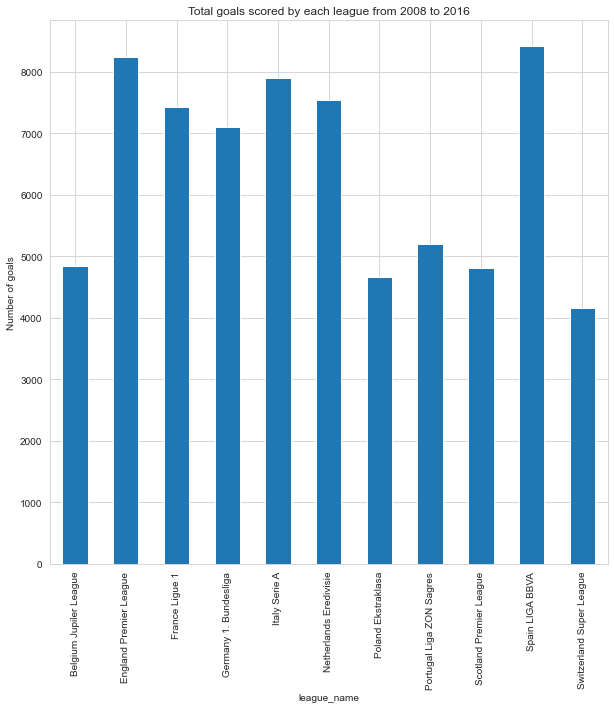

In [14]:
#First we will plot a bar chart comparing all leagues total goals in 2016
sns.set_style('whitegrid')
Match['total_goals']=Match['home_team_goal']+Match['away_team_goal']
m16=Match[Match['season_year']==2016]
m08=Match[Match['season_year']==2008]
Match.groupby('league_name').sum()['total_goals'].plot(kind='bar',figsize=(10,10))
plt.title('Total goals scored by each league from 2008 to 2016')
plt.ylabel('Number of goals')

As we can seein the previous bar chart, Spain LIGA BBV was the most scoring league from 2008 to 2016 while Switzerland Super League was the least scoring league.

Text(0, 0.5, 'Number of goals')

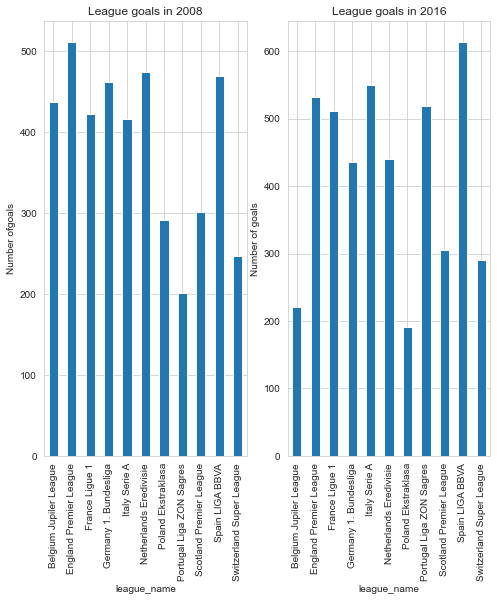

In [15]:
#Now we will se total goals scored by each league in 2008 and 2016.
mn=m16.groupby('league_name').sum()['total_goals']
ms=m08.groupby('league_name').sum()['total_goals']
xx=mn-ms
plt.subplot(1,2,1)
ms.plot(kind='bar',figsize=(8,8))
plt.title('League goals in 2008')
plt.ylabel('Number ofgoals')
plt.subplot(1,2,2)
mn.plot(kind='bar',figsize=(8,8))
plt.title('League goals in 2016')
plt.ylabel('Number of goals')


In the previous bar chart comparison we compared each team goal scoring performance in 2008 to 2016, but we need to see the difference on the same graph for better insights, that is why we will plot another chart plotting the difference.

Text(0, 0.5, 'Number of goals')

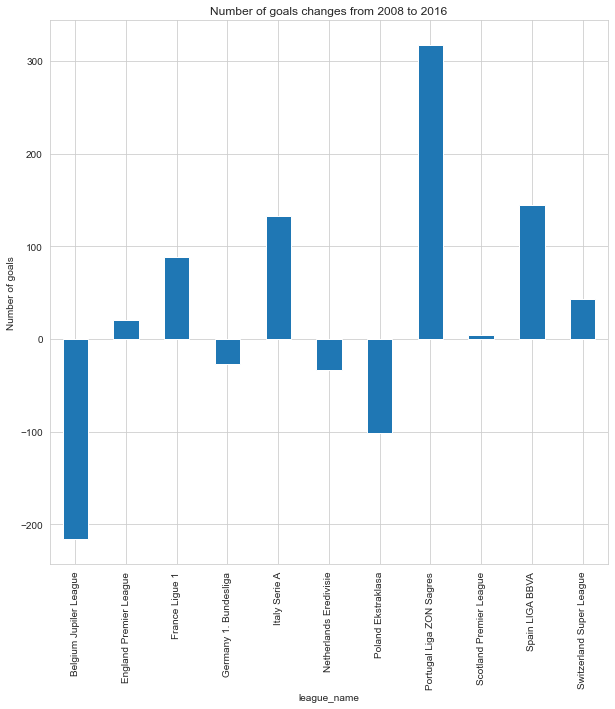

In [17]:
#And now for the decrease or increase in league goals throughout the years.
xx.plot(kind='bar',figsize=(10,10))
plt.title('Number of goals changes from 2008 to 2016')
plt.ylabel('Number of goals')

From the previous chart we can see the change in each league better, and we can see the most improved league in scoring which is Portugal Liga ZON Sagres, while the most decrease scoring performance was for Belgium Jupiter League.

### Research Question 2  (Who are the most and least winning teams overall and the most improved team)

In [18]:
#Make a function for the winner teams.
def w(Match):
    home_team_goal=Match[0]
    away_team_goal=Match[1]
    home_team_name=Match[2]
    away_team_name=Match[3]
    if home_team_goal>away_team_goal:
        return home_team_name
    elif home_team_goal<away_team_goal:
        return away_team_name
    else:
        return 'Draw'
Match['win']=Match[['home_team_goal','away_team_goal','home_team_name','away_team_name']].apply(w,axis=1)

In [19]:
#Make a function for the lost teams.
def l(Match):
    home_team_goal=Match[0]
    away_team_goal=Match[1]
    home_team_name=Match[2]
    away_team_name=Match[3]
    if home_team_goal>away_team_goal:
        return away_team_name
    elif home_team_goal<away_team_goal:
        return home_team_name
    else:
        return 'Draw'
Match['lose']=Match[['home_team_goal','away_team_goal','home_team_name','away_team_name']].apply(l,axis=1)

Text(0.5, 0, 'Teams')

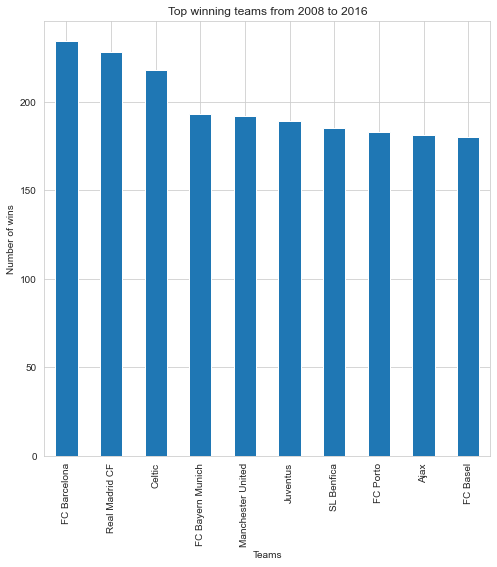

In [21]:
#Now we will plot the teams with most wins from 2008 to 2016
Match['win'].value_counts().head(11)[1:].plot(kind='bar',figsize=(8,8))
plt.title('Top winning teams from 2008 to 2016')
plt.ylabel('Number of wins')
plt.xlabel('Teams')

From this chart we can see that FC Barcelona is the team with most wins from 2008 to 2016, followed by Real Madrid CF

Text(0.5, 0, 'Teams')

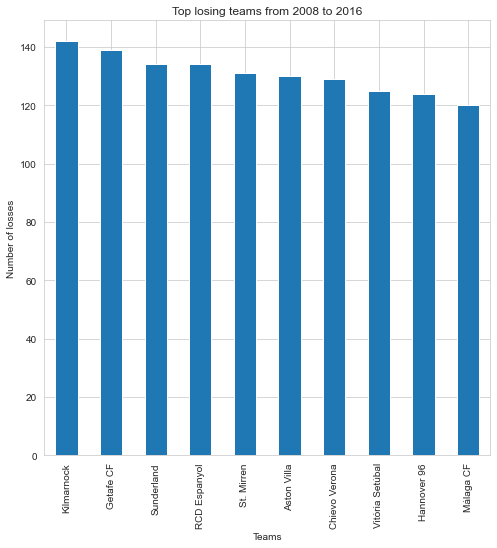

In [22]:
#Now we will plot the teams with most losses from 2008 to 2016
Match['lose'].value_counts().head(11)[1:].plot(kind='bar',figsize=(8,8))
plt.title('Top losing teams from 2008 to 2016')
plt.ylabel('Number of losses')
plt.xlabel('Teams')

From this chart we can see that Kilmarnock is the team with most losses from 2008 to 2016, followed by Getafe CF.

In [23]:
#Now we will sort the most improved teams from 2208 to 2016.
win2008 = Match[(Match['season_year'] == 2008) & (Match['win'] != 'Draw')]
lose2008 = Match[(Match['season_year'] == 2008) & (Match['lose'] != 'Draw')]
wincount08=win2008['win'].count()
losecount08=lose2008['lose'].count()
diff08=win2008['win'].value_counts()/wincount08-lose2008['lose'].value_counts()/losecount08
#Here we first made a table of total wins in 2008 then the total losses, then we counted all the wins and all the losses.
#Then we divided the value counts of wins by number of total wins to get proportion of how many wins the team had with respect
#to total wins and the same procedure for losses , then we substract them to get the improvement in match results.

In [24]:
#Here we made the same previous procedure but for year 2016.
win2016 = Match[(Match['season_year'] == 2016) & (Match['win'] != 'Draw')]
lose2016 = Match[(Match['season_year'] == 2016) & (Match['lose'] != 'Draw')]
wincount16=win2016['win'].count()
losecount16=lose2016['lose'].count()
diff16=win2016['win'].value_counts()/wincount16-lose2016['lose'].value_counts()/losecount16

In [25]:
#Now we will examine the improvemet in goals scored by getting the mean of goals scored by a team at home, and goals scored away
#Then we add both averages and get their average also to get mean goals scored each season for each match.
m08home=m08.groupby('home_team_name')['home_team_goal'].mean()
m08away=m08.groupby('away_team_name')['away_team_goal'].mean()
m16home=m16.groupby('home_team_name')['home_team_goal'].mean()
m16away=m16.groupby('away_team_name')['away_team_goal'].mean()
m08total=(m08home+m08away)/2
m16total=(m16home+m16away)/2
improv=((m16total-m08total)+(diff16-diff08))/2
improv.dropna(inplace=True)
#In the end we add the match results and goals scored improvemets to get total improvement then also get their mean.

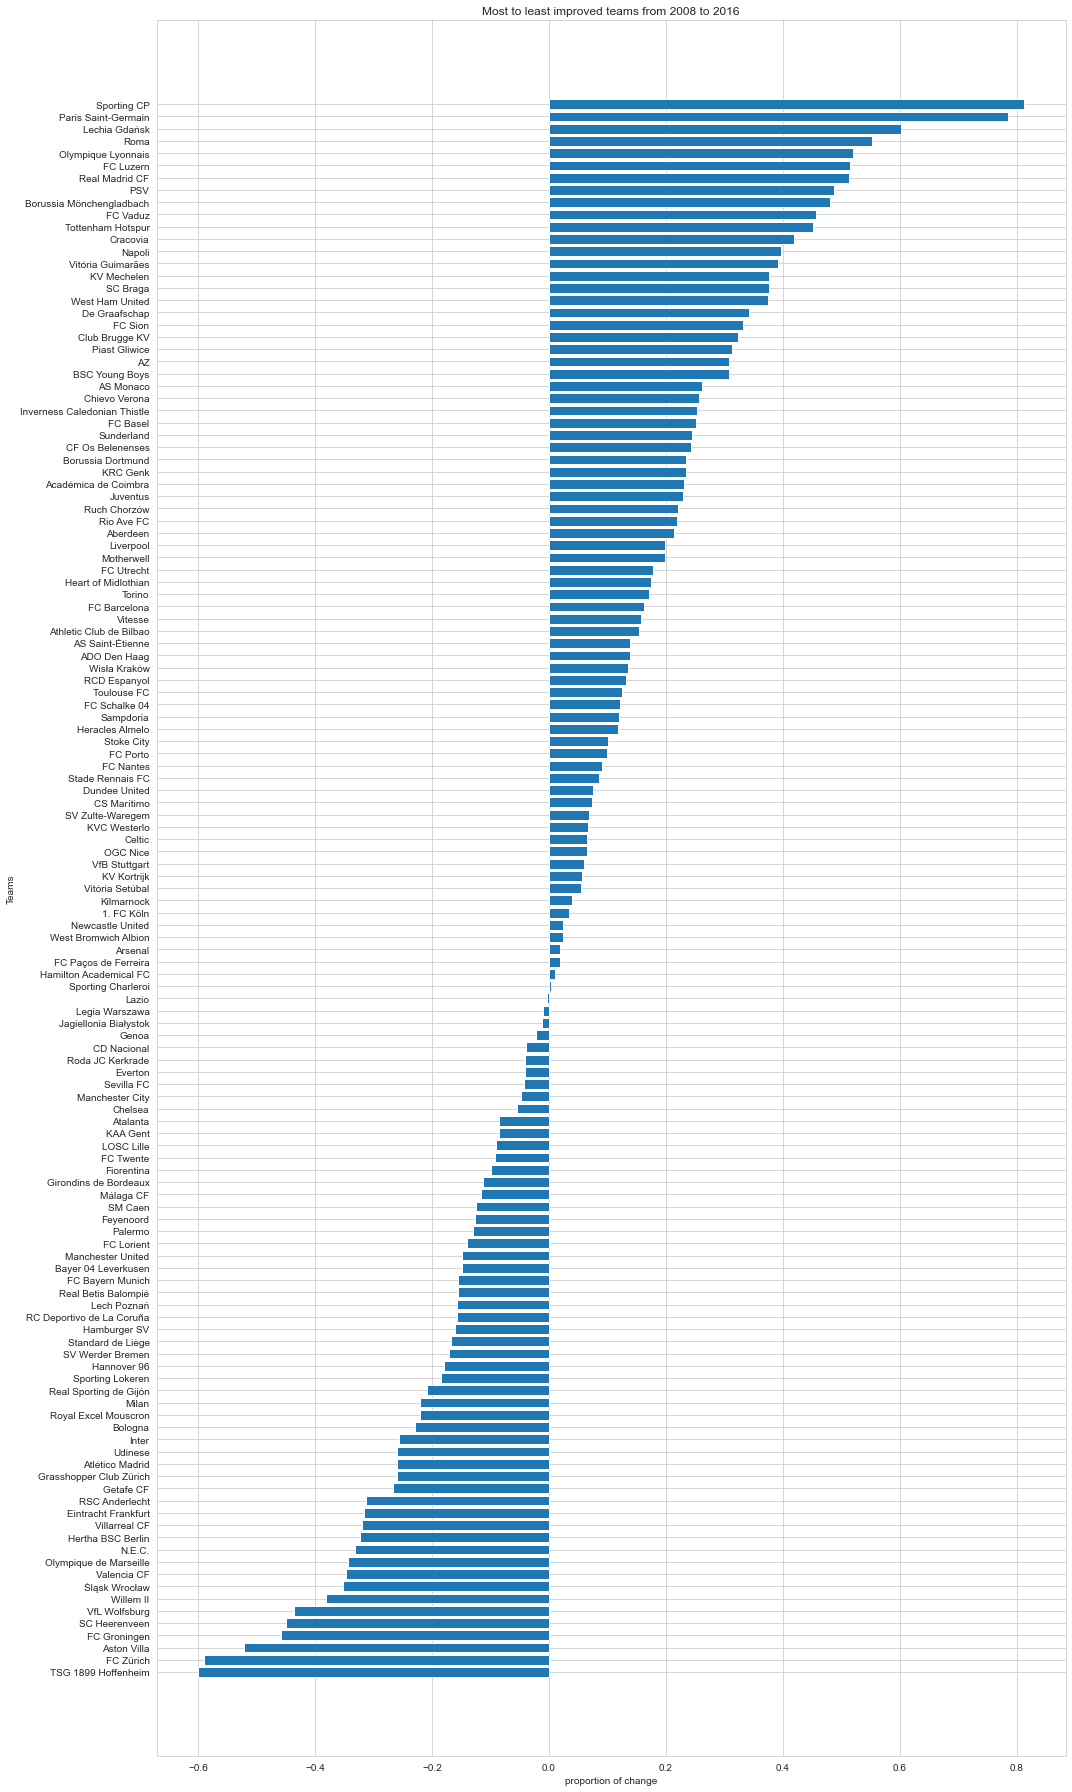

In [27]:
#Now we will plot a sorted bar chart of best and worst improved teams from 2008 to 2016.
sorted_index = improv.sort_values().index
fig, ax = plt.subplots(figsize=(15, 25))
plt.barh(range(0,len(sorted_index)), improv.sort_values())
ax.set_yticks(range(0,len(sorted_index)))
ax.set_yticklabels(sorted_index)
plt.title('Most to least improved teams from 2008 to 2016')
plt.xlabel('proportion of change')
plt.ylabel('Teams')
plt.tight_layout()

So as we see from the previous chart, Sporting CP followed by Paris Saint-Germain had the most improvement in scoring and wins fromm 2008 to 2016, while Sporting Charleroi and Lazio had nearly no improvements , and also TSG 1899 Hoffenheim and FC Zurich had the most decline in performance.

### Research Question 3  (What are the attributes of the top winning and scoring teams)

Text(0, 0.5, 'Number of wins')

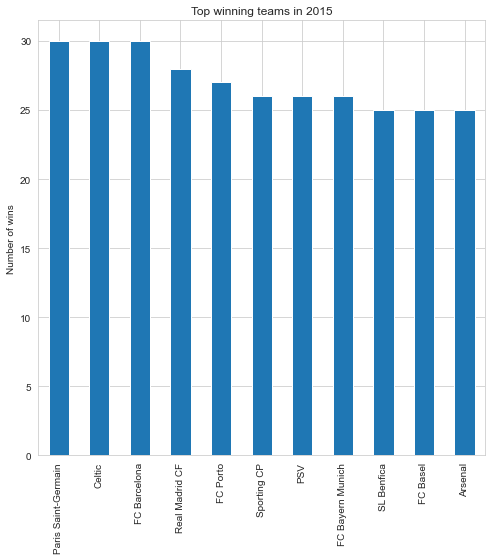

In [64]:
#First we need to know top 5 winning and scoring teams in 2015.
m15=Match[(Match['season_year']==2015) &(Match['win'] != 'Draw')]
m15['win'].value_counts().head(11).plot(kind='bar',figsize=(8,8))
plt.title('Top winning teams in 2015')
plt.ylabel('Number of wins')

This chart represents the teams with most wins in 2015 and as we can see the top 5 teams had close results.

In [28]:
m15g=Match[(Match['season_year']==2015)]
m15home=m15g.groupby('home_team_name')['home_team_goal'].sum()
m15away=m15g.groupby('away_team_name')['away_team_goal'].sum()
m15t=m15home+m15away
m15t.sort_values(ascending=False).head()
#These are the top 5 scoring teams and their total goals count in 2015.

home_team_name
FC Barcelona           109
Real Madrid CF         108
Paris Saint-Germain     99
Celtic                  97
SL Benfica              89
dtype: int64

**As we can see the top 4 winning teams are the top 4 scoring teams,so in this part we will be studying the attributes of the top 5 winning teams and what makes FC Barcelona the best overall.** 

In [29]:
#We will now make another table inclusing only top 5 winning teams in 2015 season.
Team['season']=Team['date'].dt.year
Top=Team.query("team_long_name in ['Celtic','Paris Saint-Germain','Real Madrid CF','FC Barcelona','FC Porto'] & season==2015 ")
Top.groupby('team_long_name').mean()
#Here we will first examine the countable attributes.

,id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,season
team_long_name,,,,,,,,,,
Celtic,39395,54,53,51,51,62,58,55,56,2015
FC Barcelona,43042,36,51,36,49,56,61,65,65,2015
FC Porto,35283,70,53,56,66,68,58,60,60,2015
Paris Saint-Germain,9548,49,34,62,61,35,57,53,56,2015
Real Madrid CF,43040,50,46,61,41,63,52,60,63,2015


Text(0.5, 1.0, 'FC Porto has the best build up play speed stats')

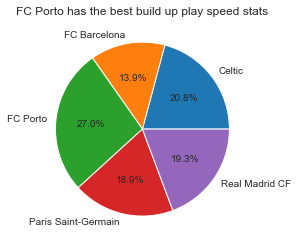

In [30]:
#We will examine the difference between different attributes.
Top.groupby(['team_long_name'])['buildUpPlaySpeed'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('FC Porto has the best build up play speed stats')

This is a pie chart representing of which team has the best build up play speed.

Text(0.5, 1.0, 'Celtic and FC Porto has the best build up play passing stats')

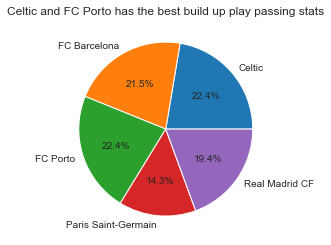

In [31]:
Top.groupby(['team_long_name'])['buildUpPlayPassing'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Celtic and FC Porto has the best build up play passing stats')

This is a pie chart representing of which team has the best build up play passing.

Text(0.5, 1.0, 'FC Porto has the best shooting chance creation stats')

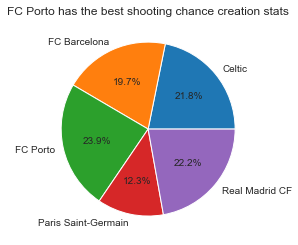

In [32]:
Top.groupby(['team_long_name'])['chanceCreationShooting'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('FC Porto has the best shooting chance creation stats')

This is a pie chart representing of which team has the best shooting chance creation.

Text(0.5, 1.0, 'FC Barcelona has the best defence pressure')

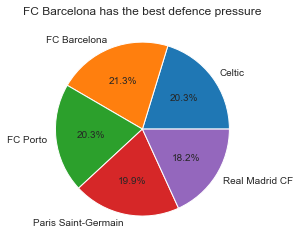

In [33]:
Top.groupby(['team_long_name'])['defencePressure'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('FC Barcelona has the best defence pressure')

This is a pie chart representing of which team has the best defence pressure.

Text(0, 0.5, 'attributes value')

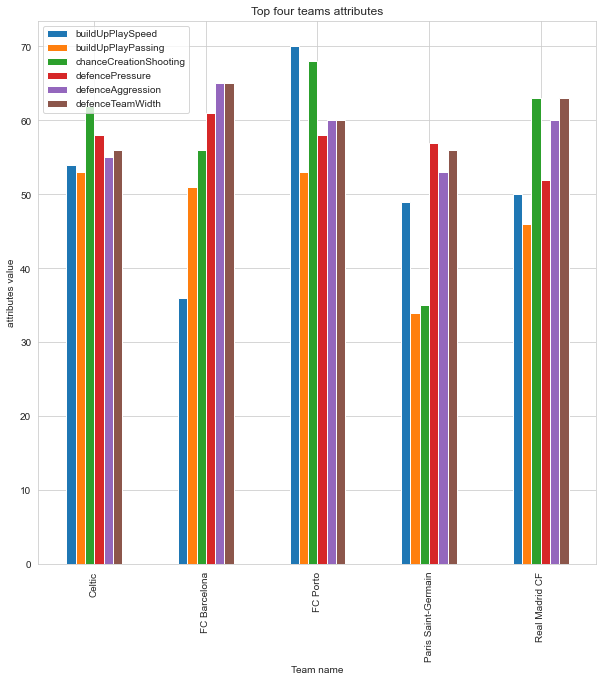

In [34]:
#Now we will compare some attributes side to side for the top 5 winning teams.
(Top.groupby('team_long_name')[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']].mean()).plot.bar(figsize=(10,10))
plt.title('Top four teams attributes')
plt.xlabel('Team name')
plt.ylabel('attributes value')

As we can see FC Porto had the fastest play and best shooting chances creation with a big difference but that wasn't enough to be the best team. Meanwhile, FC Barcelona had the highest defensive attributes overall , and apparently that is what makes this team the most winning and scoring team.

Text(0.5, 1.0, 'Defence aggression class')

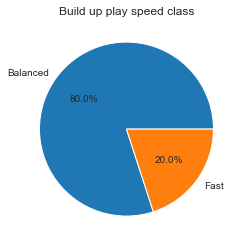

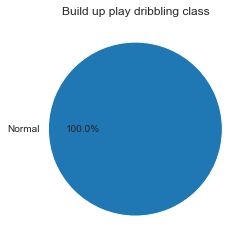

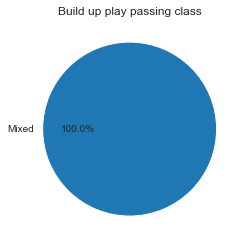

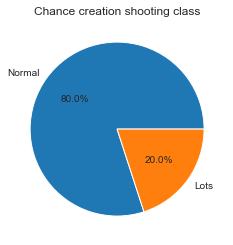

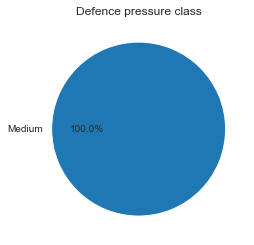

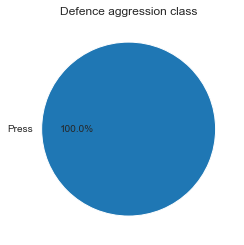

In [35]:
#Now we get to the descriptive attributes.
descreptive = Top[['team_long_name','buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']]
plt.figure(0)
descreptive['buildUpPlaySpeedClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Build up play speed class')
plt.figure(1)
descreptive['buildUpPlayDribblingClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Build up play dribbling class')
plt.figure(2)
descreptive['buildUpPlayPassingClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Build up play passing class')
plt.figure(3)
descreptive['chanceCreationShootingClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Chance creation shooting class')
plt.figure(4)
descreptive['defencePressureClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Defence pressure class')
plt.figure(5)
descreptive['defenceAggressionClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Defence aggression class')

Text(0.5, 1.0, 'Chance creation positioning class')

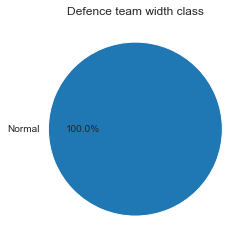

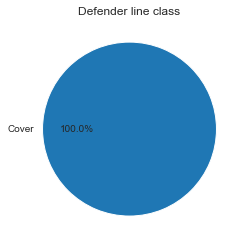

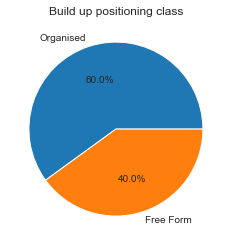

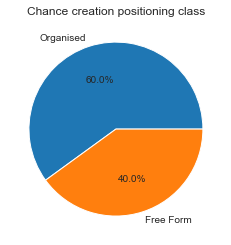

In [36]:
plt.figure(6)
descreptive['defenceTeamWidthClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Defence team width class')
plt.figure(7)
descreptive['defenceDefenderLineClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Defender line class')
plt.figure(8)
descreptive['buildUpPlayPositioningClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Build up positioning class')
plt.figure(9)
descreptive['chanceCreationPositioningClass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Chance creation positioning class')

**So as we see most if not all top teams have a mostly similar approach mainly in their descreptive attributes.**

### Research Question 4  (Who has the highest record for penalties)

Text(0, 0.5, 'penalties')

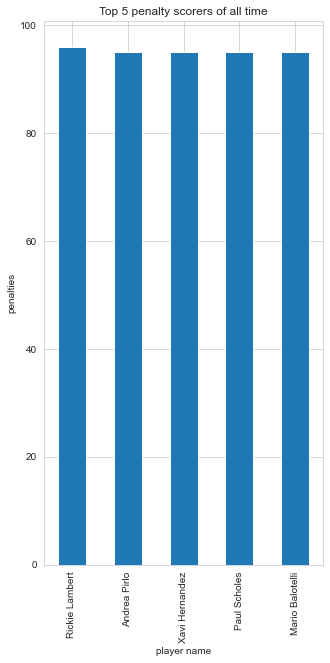

In [37]:
sns.set_style('whitegrid')
Player.groupby('player_name')['penalties'].max().sort_values(ascending=False).head().plot.bar(figsize=(5,10))
plt.title('Top 5 penalty scorers of all time')
plt.xlabel('player name')
plt.ylabel('penalties')
#This plot will showcase the top penalties takers and their records side to side.

In [39]:
#Now we will see the number of penalties they scored.
Player.groupby('player_name')['penalties'].max().sort_values(ascending=False).head()

player_name
Rickie Lambert     96.0
Andrea Pirlo       95.0
Xavi Hernandez     95.0
Paul Scholes       95.0
Mario Balotelli    95.0
Name: penalties, dtype: float64

As we can see from the bar chart and the table under, we can see the top penalty takers and their records, Rickie Lambert having the highest record for now with 96 penalties.

### Research Question 5  (Who are the highest rated players and their attributes and the relation between attributes and overall rating)

In [40]:
#First we extract the top rated players.
Player.groupby('player_name')[['overall_rating']].max().sort_values(by='overall_rating',ascending=False).head()

,overall_rating
player_name,
Lionel Messi,94.0
Cristiano Ronaldo,93.0
Gianluigi Buffon,93.0
Wayne Rooney,93.0
Gregory Coupet,92.0


In [41]:
#We will not be including Gianluigi Buffon and Gregory Coupet because they are goal keepers, and we will remove all unnecessary
#columns that include descreptive data and also goal keeper stats for better investigation.
Best3=Player.query("player_name in ['Lionel Messi','Cristiano Ronaldo','Wayne Rooney']")
Bestt=Best3.groupby('player_name').max()
Bestt.drop(columns=['id','height','weight','date','preferred_foot','attacking_work_rate','defensive_work_rate','date_year'],inplace=True)
Bestt.drop(columns=['gk_reflexes','gk_positioning','gk_kicking','gk_handling','gk_diving','standing_tackle','sliding_tackle'],inplace=True)
Bestt.drop(columns=['birth_year','marking','penalties','vision','interceptions','aggression','strength'],inplace=True)
Bestt.drop(columns=['jumping','free_kick_accuracy','curve','heading_accuracy'],inplace=True)
Bestt

,overall_rating,potential,crossing,finishing,short_passing,volleys,dribbling,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,stamina,long_shots,positioning
player_name,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,93.0,95.0,89.0,95.0,84.0,87.0,97.0,73.0,96.0,95.0,94.0,94.0,92.0,84.0,95.0,91.0,93.0,93.0
Lionel Messi,94.0,97.0,85.0,97.0,90.0,91.0,97.0,79.0,97.0,96.0,95.0,96.0,96.0,95.0,84.0,83.0,89.0,93.0
Wayne Rooney,93.0,93.0,81.0,94.0,88.0,89.0,90.0,86.0,93.0,92.0,90.0,80.0,89.0,89.0,95.0,92.0,92.0,91.0


Text(0.5, 1.0, 'Relation between positioning and overall rating')

<Figure size 432x288 with 0 Axes>

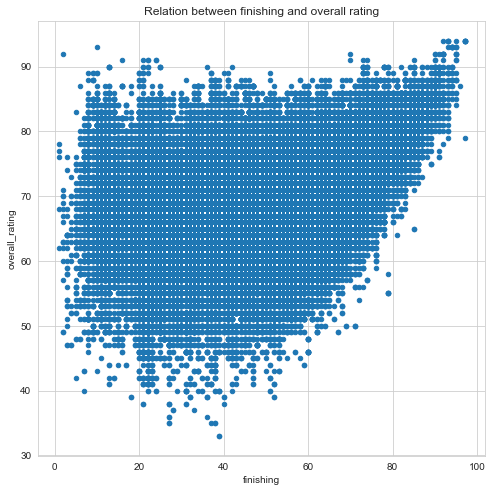

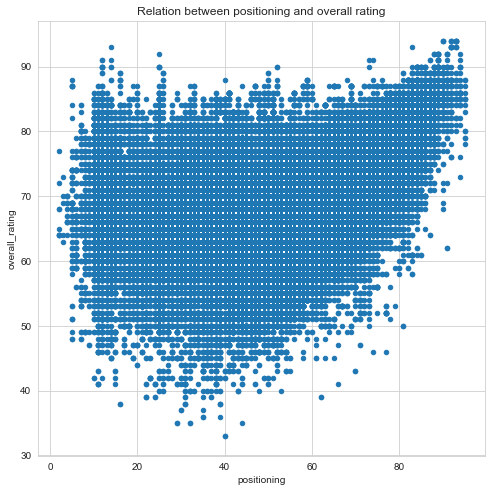

In [42]:
#After eleminating columns that were low in value for the top players we chose four attributes for further investigation.
#We will see the relation between overall rating and positioning, dribbling, ball control and finishing.
plt.figure(0)
Player.plot(x='finishing',y='overall_rating',kind='scatter',figsize=(8,8))
plt.title('Relation between finishing and overall rating')
plt.figure(1)
Player.plot(x='positioning',y='overall_rating',kind='scatter',figsize=(8,8))
plt.title('Relation between positioning and overall rating')

Text(0.5, 1.0, 'Relation between dribbling and overall rating')

<Figure size 432x288 with 0 Axes>

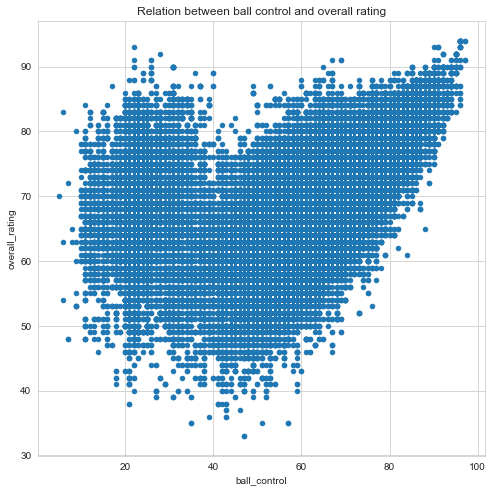

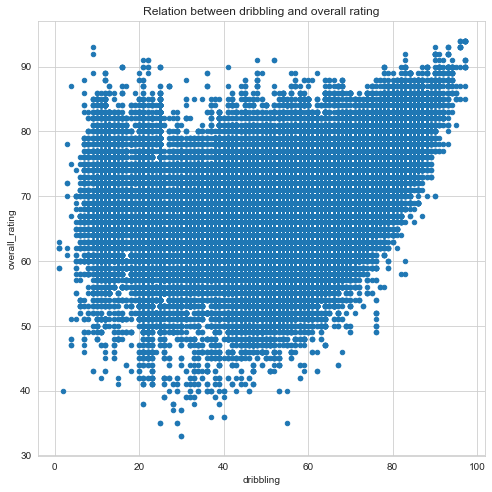

In [43]:
plt.figure(2)
Player.plot(x='ball_control',y='overall_rating',kind='scatter',figsize=(8,8))
plt.title('Relation between ball control and overall rating')
plt.figure(3)
Player.plot(x='dribbling',y='overall_rating',kind='scatter',figsize=(8,8))
plt.title('Relation between dribbling and overall rating')

As we can see from the top scatter plots, all these attributes(finishing, positioning , dribbling and ball control) had positive correlation with the overall rating.

### Research Question 6  (Who are the most promising young soccer stars)

In [44]:
#First we calculate the mean overall rating and filter players who are 21 or younger.
Young=Player.query('birth_year >= 1994')
Player['overall_rating'].mean()

68.63280955234481

In [45]:
#Here we extract the top 5 players that are 21 or under and their overall rating is also above average.
Young_stars=Young.query("overall_rating>68.63280955234481")
Young_stars.groupby('player_name')['overall_rating'].max().sort_values(ascending=False).head()

player_name
Aymeric Laporte    83.0
Raheem Sterling    82.0
Memphis Depay      81.0
Marquinhos         81.0
Jose Gimenez       81.0
Name: overall_rating, dtype: float64

Text(0, 0.5, 'overall_rating')

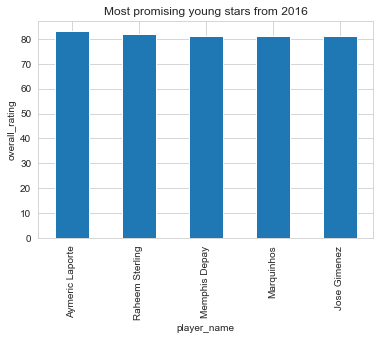

In [46]:
#Here we plot the top 5 young players against their overall rating side to side.
Young_stars.groupby('player_name')['overall_rating'].max().sort_values(ascending=False).head().plot.bar()
plt.title('Most promising young stars from 2016')
plt.ylabel('overall_rating')

So as we see these 5 players are the top 5 under 21 players with overall rating higher than the average, and this plot compares their overall rating side to side but as we can see they are somehow similar.

<a id='conclusions'></a>
## Conclusions
1-Spain Liga BBV is the most offensive league overall and in 2016 with the most goals scored, while Poland Ekstraklasa was the most defensive with the least goals scored in 2016. Also, Portugal Liga Zon sagres had the most increase in goals scored from 2008 to 2016, while Belgium Jupiler League had the most major decrease in goals scored.

2-FC Barcelona had the most wins overall, while Kilmarnock had the most overall losses.Also, Sporting CP was the most improved team from 2008 to 2016 in regards to mean goals scored per match and proportion of wins to matches, and the next most improved team was Paris Saint-Germain, which makes a lot of sense.

3-The top 5 teams had mostly similar attributes like normal paced play, rely more on dribbling and shooting creation chances, but what made FC Barcelona stand out in competition with most wins and most goals scored was its defence strategy. FC Barcelona had the highest defence pressure, defence aggression and defence team width.

4-Lionel Messi, Cristiano Ronaldo and Wayne Rooney were the highest rated players overall, and what we found that their highest attributes were finishing , positioning , dribbling , ball control and accelreation. These attributes showed positive linear correlation on graph when plotted against overall rating.

5-The highest penalty record is given to Rickie Lambert with 96 penalty! Following him are Andrea Pirlo, Xavi Hernandez, PaulScholes and Mario Balotelli with 95 penalties. 

6-The most promising stars under 21 are Aymeric Laporte, Raheem Sterling, Memphis Depay, Marquinhos and Jose Gimenez. Which is fascinating because they all by now are playing in top teams in the world and have fantastic skills and careers.

### Limitations
The only limitations that were faced are that there was so many null values and missing data that had to be neglected, and also that the number of matches in each league were not equal ,but in the end it was not a major limition.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])